In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

seed = 1234
np.random.seed(seed)  

In [34]:
M = np.load('data/synergy.npy')
X, y = M[:, :-1], M[:, -1]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=seed)

In [35]:
X_tr.shape

(48124, 12)

### Baseline: Majority Class (MC)

In [17]:
np.sum(y == 0)

29884

In [18]:
np.sum(y == 1)

30272

In [19]:
np.sum(y == 1) / y.shape[0]

0.5032249484673184

### Sum of winrates

In [20]:
y_pred = np.sum(X[:, :5], axis=1) > np.sum(X[:, 5:10], axis=1)

In [21]:
accuracy_score(y, y_pred)

0.5507513797459938

### Majority of winrates by position

In [22]:
count = np.sum(X[:, :5] > X[:, 5:10], axis=1)

In [23]:
y_pred = count > 5/2
accuracy_score(y, y_pred)

0.542871866480484

### Majority of winrates by sorted order

In [24]:
count = np.sum(np.sort(X[:, :5], axis=1) > np.sort(X[:, 5:10], axis=1), axis=1)

In [25]:
y_pred = count > 5/2
accuracy_score(y, y_pred)

0.5499368309063103

### Median winrates

In [26]:
y_pred = np.median(X[:, :5], axis=1) > np.mean(X[:, 5:10], axis=1)
accuracy_score(y, y_pred)

0.5451825254338719

### Decision Tree

In [27]:
max_depth = [2, 5, 7, 10, 20]
dt_train_acc = []
dt_val_acc = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_tr, y_tr)
    dt_val_acc.append(dt.score(X_te, y_te))
    dt_train_acc.append(dt.score(X_tr, y_tr))

print(dt_train_acc)
print(dt_val_acc)

[0.6303507605352838, 0.6360028260327487, 0.6442731277533039, 0.6778530462970659, 0.9485911395561466]
[0.6333942819148937, 0.6363031914893617, 0.6331449468085106, 0.6217586436170213, 0.5639960106382979]


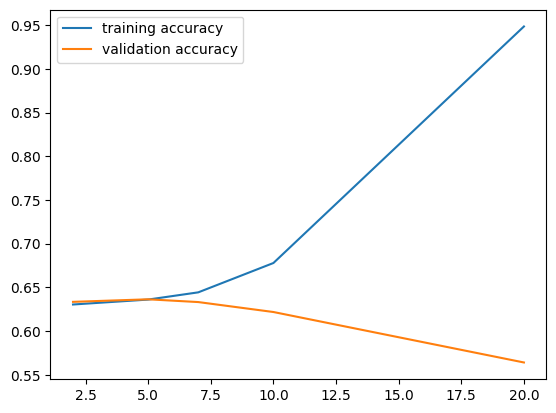

In [28]:
fig, ax = plt.subplots()
ax.plot(max_depth, dt_train_acc, label = 'training accuracy')
ax.plot(max_depth, dt_val_acc, label = 'validation accuracy')
ax.legend()

plt.show()

### Random Forest

In [29]:
n_est = [20, 50, 100, 200, 500]
rf_train_acc = []
rf_val_acc = []

for i in n_est:
    rfc = RandomForestClassifier(n_estimators= i, max_depth=5, random_state=seed)
    rfc.fit(X_tr, y_tr)
    rf_val_acc.append(rfc.score(X_te, y_te))
    rf_train_acc.append(rfc.score(X_tr, y_tr))

print(rf_train_acc)
print(rf_val_acc)

[0.6345066910481256, 0.6342988945224836, 0.6344235724378688, 0.634839165489153, 0.6348807247942815]
[0.6371343085106383, 0.6363863031914894, 0.636469414893617, 0.6371343085106383, 0.6361369680851063]


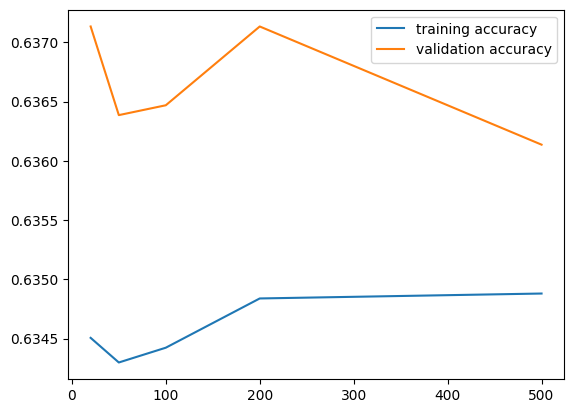

In [30]:
fig, ax = plt.subplots()
ax.plot(n_est, rf_train_acc, label = 'training accuracy')
ax.plot(n_est, rf_val_acc , label = 'validation accuracy')
ax.legend()

plt.show()

### KNN

In [31]:
neighbors = [1, 3, 5, 10, 20, 50]
knn_tra_acc = []
knn_val_acc = []

for i in neighbors:
    kn = KNeighborsClassifier(n_neighbors= i)
    kn.fit(X_tr, y_tr)
    knn_tra_acc.append(kn.score(X_tr, y_tr))
    knn_val_acc.append(kn.score(X_te, y_te))

print(knn_tra_acc)
print(knn_val_acc)

[1.0, 0.7806084282270801, 0.7314437702601613, 0.6841492810240213, 0.6631826115867343, 0.6473069570276785]
[0.561751994680851, 0.5875166223404256, 0.5969913563829787, 0.6026429521276596, 0.6143617021276596, 0.62890625]


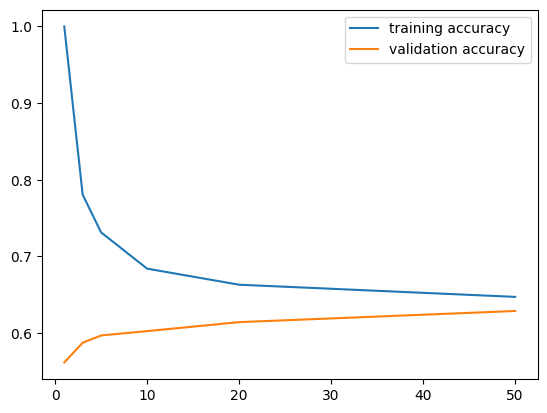

In [32]:
fig, ax = plt.subplots()
ax.plot(neighbors, knn_tra_acc, label = 'training accuracy')
ax.plot(neighbors, knn_val_acc , label = 'validation accuracy')
ax.legend()

plt.show()

### Keras

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the number of input features
num_features = X_tr.shape[1]

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_tr, y_tr, epochs=10, batch_size=32, validation_data=(X_te, y_te))


Epoch 1/10
1504/1504 [==============================] - 5s 3ms/step - loss: 0.6407 - accuracy: 0.6247 - val_loss: 0.6294 - val_accuracy: 0.6368
Epoch 2/10
1504/1504 [==============================] - 4s 3ms/step - loss: 0.6366 - accuracy: 0.6283 - val_loss: 0.6303 - val_accuracy: 0.6351
Epoch 3/10
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6353 - accuracy: 0.6310 - val_loss: 0.6290 - val_accuracy: 0.6347
Epoch 4/10
1504/1504 [==============================] - 4s 3ms/step - loss: 0.6343 - accuracy: 0.6289 - val_loss: 0.6286 - val_accuracy: 0.6336
Epoch 5/10
1504/1504 [==============================] - 4s 2ms/step - loss: 0.6344 - accuracy: 0.6300 - val_loss: 0.6288 - val_accuracy: 0.6356
Epoch 6/10
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6349 - accuracy: 0.6309 - val_loss: 0.6314 - val_accuracy: 0.6346
Epoch 7/10
1504/1504 [==============================] - 5s 3ms/step - loss: 0.6348 - accuracy: 0.6304 - val_loss: 0.6282 - val_accuracy:

In [58]:
y_pred = model.predict(X_te)

376/376 [==============================] - 1s 2ms/step


In [59]:
y_pred = y_pred.reshape((y_pred.shape[0]))

In [60]:
y_pred = y_pred > 0.5

In [61]:
accuracy_score(y_pred, y_te)

0.6343916223404256

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import train_test_split

# Define the number of input features
num_features = X_tr.shape[1]

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model
history = model.fit(X_tr, y_tr, epochs=30, batch_size=64, validation_data=(X_te, y_te), callbacks=[early_stop, checkpoint])

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_te, y_te)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/30
752/752 [==============================] - 3s 3ms/step - loss: 0.7779 - accuracy: 0.6164 - val_loss: 0.6836 - val_accuracy: 0.6358
Epoch 2/30
752/752 [==============================] - 2s 3ms/step - loss: 0.6789 - accuracy: 0.6269 - val_loss: 0.6594 - val_accuracy: 0.6362
Epoch 3/30
752/752 [==============================] - 4s 5ms/step - loss: 0.6663 - accuracy: 0.6278 - val_loss: 0.6542 - val_accuracy: 0.6362
Epoch 4/30
752/752 [==============================] - 3s 3ms/step - loss: 0.6632 - accuracy: 0.6289 - val_loss: 0.6506 - val_accuracy: 0.6356
Epoch 5/30
752/752 [==============================] - 2s 3ms/step - loss: 0.6621 - accuracy: 0.6282 - val_loss: 0.6485 - val_accuracy: 0.6356
Epoch 6/30
752/752 [==============================] - 4s 5ms/step - loss: 0.6613 - accuracy: 0.6286 - val_loss: 0.6498 - val_accuracy: 0.6339
Epoch 7/30
752/752 [==============================] - 3s 5ms/step - loss: 0.6607 - accuracy: 0.6285 - val_loss: 0.6512 - val_accuracy: 0.6337
Epoch 

In [68]:
y_pred = X[:, 10] > X[:, 11]
accuracy_score(y, y_pred)

0.6106124077398764

In [72]:
from keras.models import load_model

# load the saved model
best_model = load_model('best_model.h5')

# make predictions using the loaded model
y_pred = best_model.predict(X_te)

# evaluate the loaded model on test data
loss, accuracy = best_model.evaluate(X_te, y_te)

376/376 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.6362


In [85]:
import pandas as pd
df = pd.read_csv('data/10winrate_synergy.csv')

In [87]:
df_shuffled = df.sample(frac=1.0, random_state=42)

In [90]:
train_df = df_shuffled.iloc[:int(0.8*len(df_shuffled))]
val_df = df_shuffled.iloc[int(0.8*len(df_shuffled)):]

In [92]:
from autogluon.tabular import TabularPredictor

label = 't1_win'
predictor = TabularPredictor(label=label).fit(train_df)

results = predictor.evaluate(val_df)

No path specified. Models will be saved in: "AutogluonModels\ag-20230510_022610\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230510_022610\"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    48124
Train Data Columns: 12
Label Column: t1_win
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9779.76 MB
	Train Data (Original)  Memory Usage: 4.62 MB 

In [93]:
y_pred = predictor.predict(val_df.drop(columns=[label]))

In [94]:
predictor.evaluate(val_df, silent=True)

{'accuracy': 0.6460272606382979,
 'balanced_accuracy': 0.6460843530373086,
 'mcc': 0.2922669978982899,
 'roc_auc': 0.708428434739512,
 'f1': 0.6498972461981094,
 'precision': 0.6402656300615485,
 'recall': 0.6598230679352362}

In [95]:
predictor.leaderboard(val_df, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.648936,0.6540,0.284256,0.068849,82.088836,0.284256,0.068849,82.088836,1,True,10
1,CatBoost,0.647440,0.6544,0.055026,0.016885,3.533003,0.055026,0.016885,3.533003,1,True,7
2,WeightedEnsemble_L2,0.646027,0.6612,2.658311,0.710538,110.553823,0.008006,0.015595,2.382920,2,True,14
3,LightGBMXT,0.645529,0.6564,0.026277,0.017913,1.175434,0.026277,0.017913,1.175434,1,True,3
4,XGBoost,0.645196,0.6552,0.027884,0.016265,2.265994,0.027884,0.016265,2.265994,1,True,11
5,LightGBM,0.643534,0.6552,0.036644,0.013340,0.802821,0.036644,0.013340,0.802821,1,True,4
6,NeuralNetTorch,0.643201,0.6512,0.052102,0.016594,67.022097,0.052102,0.016594,67.022097,1,True,12
7,RandomForestEntr,0.639295,0.6492,0.781153,0.203829,17.973119,0.781153,0.203829,17.973119,1,True,6
8,LightGBMLarge,0.638547,0.6520,0.017243,0.008024,0.888731,0.017243,0.008024,0.888731,1,True,13
9,RandomForestGini,0.638132,0.6292,0.827243,0.203755,9.658838,0.827243,0.203755,9.658838,1,True,5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

seed = 1234
np.random.seed(seed)

In [42]:
synergy = pd.read_csv('data/13data.csv')
y = np.array(synergy[['t1_win']]).ravel()
X = synergy.drop(['t1_win'], axis = 1)
X = X.to_numpy()

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=seed)

In [47]:
X_test.shape

(5492, 12)

In [43]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear',random_state=seed).fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.7183175528040786
